![trader](trader.jpg)


Asset allocation is the most important decision that any investor needs to face. They need to decide how to spread their total capital over certain assets (in this case, stocks). When considering the allocation, the investor wants to balance the risk and the potential reward. At the same time, the allocation depends on factors such as individual goals, risk tolerance, and the investment horizon.

The key framework used in asset allocation is the Modern Portfolio Theory (MPT), which was introduced by the Nobel Prize winner Harry Markowitz. MPT describes how investors can construct portfolios to maximize their expected returns for a given level of risk or, conversely, minimize risk for a given level of expected return. The mathematical framework used to achieve this is called mean-variance optimization.

The main insight from MPT is that investors should not evaluate an asset’s performance alone. Instead, they should evaluate how it would impact the performance of a portfolio of assets. Another important takeaway is the concept of diversification, which means that owning different kinds of assets reduces risk. That is because the loss or gain of a particular security has less impact on the overall portfolio’s performance.

**Your task**

In the dynamic realm of finance, data scientists/analysts are often tasked with finding optimal investment strategies. Imagine you're one such analyst, and you were asked to build an effective portfolio comprising FAANG stocks – Facebook (Meta), Apple, Amazon, Netflix, and Google. Your goal is to maximize returns while mitigating risk.

In this project, you are tasked to find the optimal allocation to the FAANG stocks based on historical stock price data spanning the years 2020-2023. The dataset is stored in the `faang_stocks.csv` file. For each trading day, it contains the close prices of the five tech companies.


Use the `faang_stocks.csv` dataset to complete the following analysis:

- What are the expected returns and the annualized Sharpe ratio of an equally-weighted portfolio? Assume the risk-free rate is 0% and store your answers as a float variables called `benchmark_exp_return` and `benchmark_sharpe_ratio`.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Setting the plotting style to be colorblind-friendly
plt.style.use("seaborn-colorblind")

In [4]:
stock_prices_df = pd.read_csv("faang_stocks.csv", index_col="Date")

stock_prices_df.index = pd.to_datetime(stock_prices_df.index)

print(stock_prices_df.head())

             AAPL   AMZN  GOOGL    META    NFLX
Date                                           
2020-01-02  75.09  94.90  68.43  209.78  329.81
2020-01-03  74.36  93.75  68.08  208.67  325.90
2020-01-06  74.95  95.14  69.89  212.60  335.83
2020-01-07  74.60  95.34  69.76  213.06  330.75
2020-01-08  75.80  94.60  70.25  215.22  339.26


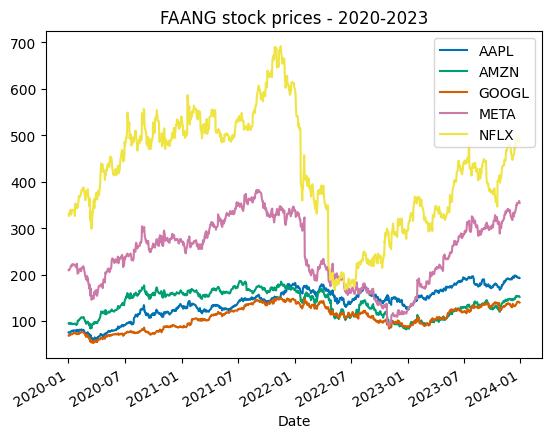

In [6]:
stock_prices_df.plot(title="FAANG stock prices - 2020-2023");

In [7]:
returns_df = stock_prices_df.pct_change().dropna()

# Calculate the 1/n portfolio weights
portfolio_weights = 5 * [0.2]

portfolio_returns = returns_df.dot(portfolio_weights)

benchmark_exp_return = portfolio_returns.mean()
print(benchmark_exp_return)

benchmark_sharpe_ratio = (portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252))
print(benchmark_sharpe_ratio)

0.0009366970530650013
0.7221868020795008


- Find a portfolio that minimizes volatility. Use mean-variance optimization. Store the volatility of the portfolio as a float variable called `mv_portfolio_vol`. Store the portfolio weights as a `pandas` Series called `mv_portfolio`. Use the tickers as index.

In [8]:
avg_returns = returns_df.mean() * 252
cov_mat = returns_df.cov() * 252

ef = EfficientFrontier(avg_returns, cov_mat)

weights = ef.min_volatility()
mv_portfolio = pd.Series(weights)

mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]
print(mv_portfolio_vol)

0.3030736711547463


- Find a portfolio that maximizes the Sharpe ratio. Use mean-variance optimization and keep the risk-free rate at 0%. Store the Sharpe ratio (annualized) of the portfolio as a float variable called `ms_portfolio_sharpe`. Store the portfolio weights as a `pandas` Series called `ms_portfolio`. Use the tickers as index.

In [9]:
ef = EfficientFrontier(avg_returns, cov_mat)

weights = ef.max_sharpe(risk_free_rate=0)
ms_portfolio = pd.Series(weights)

ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate=0)[2]
print(ms_portfolio_sharpe)

0.8821809421501474
